# Prep

In [1]:
import os
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from torch.optim.lr_scheduler import LinearLR
import torchaudio.transforms

In [3]:
import models
from experiments import perform_test
from data_preparation import gen_files

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [6]:
# path to train dir

train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"
if not os.path.exists(train_dir):
    train_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\train"

In [7]:
# run once to generate dataset files

# gen_files(train_dir)

In [8]:
# reading data from generated files 
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")

X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

classes = os.listdir(train_dir+'/audio/')

def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
INPUT_SHAPE = (85, 122)
CLASSES_COUNT = len(classes)

In [9]:
# creating datasets
y_train = torch.tensor(y_train).long()
y_val = torch.tensor(y_val).long()
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)

y_train = F.one_hot(y_train, num_classes = CLASSES_COUNT)

train_data = TensorDataset(X_train.float().transpose(2, 1), y_train.float())
valid_data = TensorDataset(X_val.float().transpose(2, 1), y_val.float())

### params

In [10]:
num_epochs = 30
batch_size = 64
lr = 0.01
weight_decay = 1e-8
masking_param = 40

In [11]:
# trans params
num_heads=5
ffn_dim=256
num_layers = 4
dropout = 0

# inception params
num_filters = 32
use_residual = True
use_bottleneck = True
depth = 10
kernel_size = 41
bottleneck_size = 32 * 4

# Tests

## Model tests

### Inception test

In [11]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0016
Test accuracy: 0.8473461032314666
Epoch [2/30], Train loss: 0.0011
Test accuracy: 0.8820002924404152
Epoch [3/30], Train loss: 0.0008
Test accuracy: 0.9210410878783448
Epoch [4/30], Train loss: 0.0008
Test accuracy: 0.930984061997368
Epoch [5/30], Train loss: 0.0008
Test accuracy: 0.9393186138324316
Epoch [6/30], Train loss: 0.0008
Test accuracy: 0.9239654920309986
Epoch [7/30], Train loss: 0.0010
Test accuracy: 0.9472145050445971
Epoch [8/30], Train loss: 0.0003
Test accuracy: 0.9450212019301067
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9469220646293318
Epoch [10/30], Train loss: 0.0002
Test accuracy: 0.9466296242140664
Epoch [11/30], Train loss: 0.0002
Test accuracy: 0.9480918262903933
Epoch [12/30], Train loss: 0.0002
Test accuracy: 0.9577423599941511
Epoch [13/30], Train loss: 0.0001
Test accuracy: 0.9577423599941511
Epoch [14/30], Train loss: 0.0005
Test accuracy: 0.9551103962567626
Epoch [15/30], Train loss: 0.0004
Test accuracy: 0.9589121

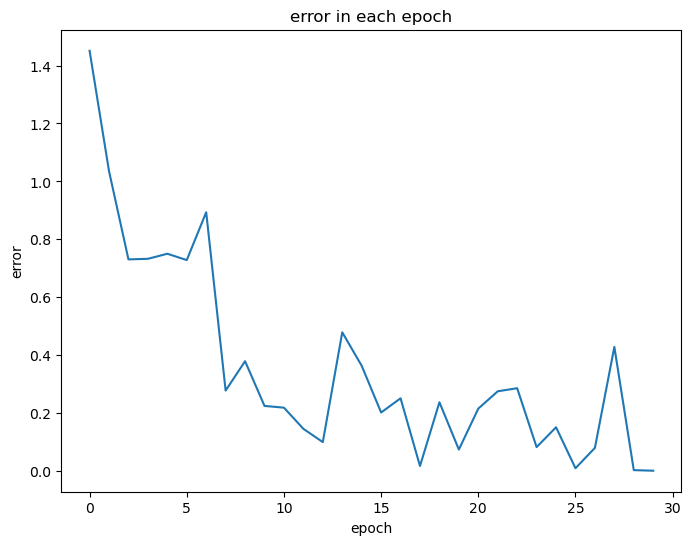

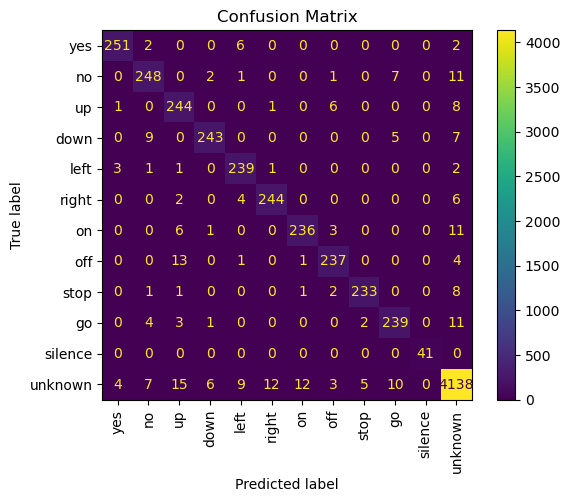

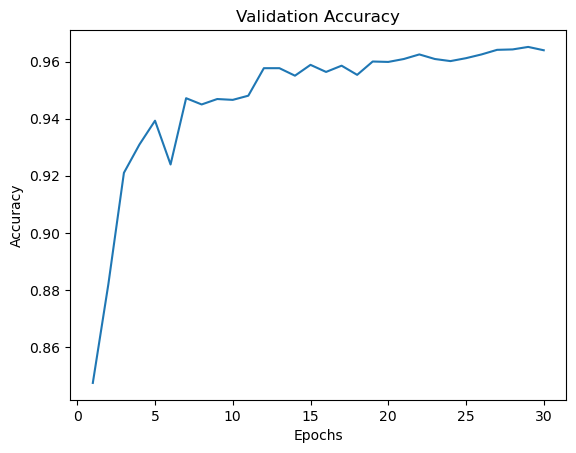

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Mod Inception test

In [11]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0017
Test accuracy: 0.8686942535458401
Epoch [2/30], Train loss: 0.0014
Test accuracy: 0.8995467173563386
Epoch [3/30], Train loss: 0.0010
Test accuracy: 0.8991080567334405
Epoch [4/30], Train loss: 0.0009
Test accuracy: 0.9352244480187162
Epoch [5/30], Train loss: 0.0009
Test accuracy: 0.9451674221377394
Epoch [6/30], Train loss: 0.0004
Test accuracy: 0.9382950723790028
Epoch [7/30], Train loss: 0.0008
Test accuracy: 0.945898523175903
Epoch [8/30], Train loss: 0.0003
Test accuracy: 0.9439976604766779
Epoch [9/30], Train loss: 0.0003
Test accuracy: 0.9558414972949262
Epoch [10/30], Train loss: 0.0002
Test accuracy: 0.9580348004094166
Epoch [11/30], Train loss: 0.0005
Test accuracy: 0.9472145050445971
Epoch [12/30], Train loss: 0.0001
Test accuracy: 0.9578885802017839
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.9521859921041088
Epoch [14/30], Train loss: 0.0003
Test accuracy: 0.9577423599941511
Epoch [15/30], Train loss: 0.0002
Test accuracy: 0.9580348

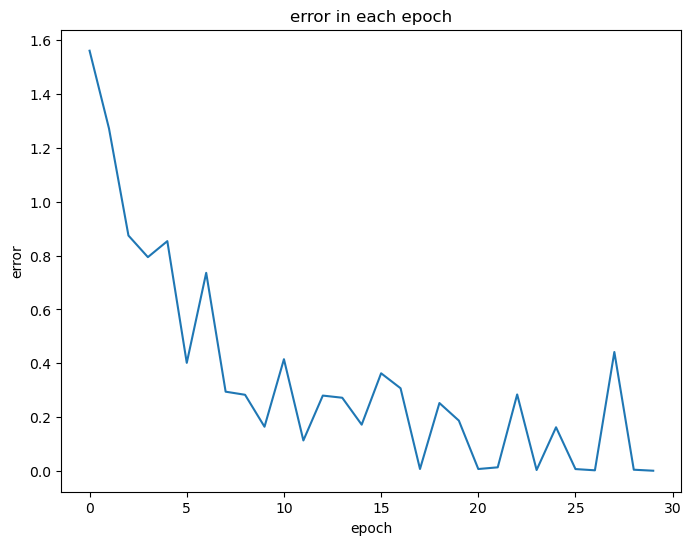

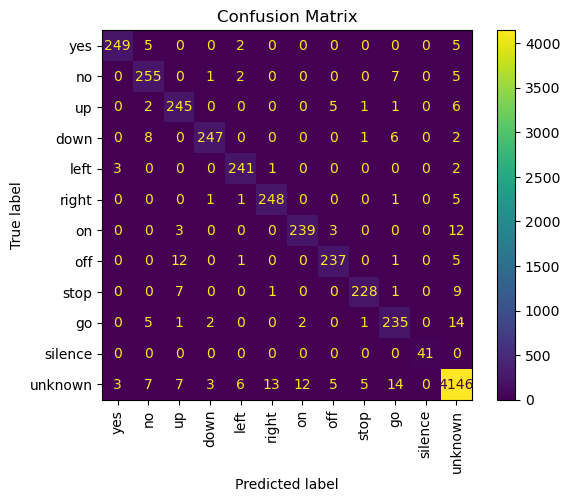

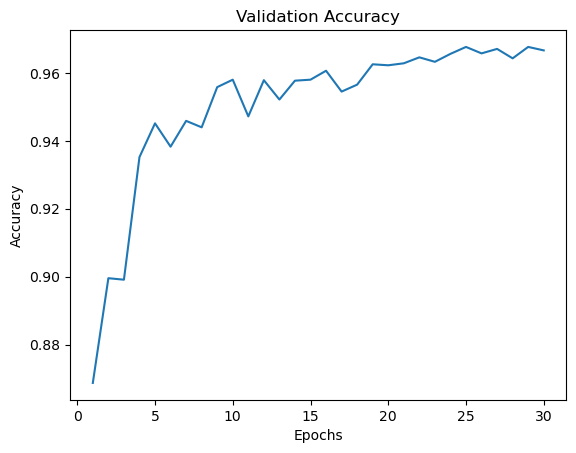

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Conformer test

In [13]:
model = models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0073
Test accuracy: 0.4212604181897938
Epoch [2/30], Train loss: 0.0073
Test accuracy: 0.5032899546717357
Epoch [3/30], Train loss: 0.0075
Test accuracy: 0.0394794560608276
Epoch [4/30], Train loss: 0.0072
Test accuracy: 0.6084222839596433
Epoch [5/30], Train loss: 0.0061
Test accuracy: 0.07764293025296096
Epoch [6/30], Train loss: 0.0034
Test accuracy: 0.45766924989033486
Epoch [7/30], Train loss: 0.0022
Test accuracy: 0.6288931130282205
Epoch [8/30], Train loss: 0.0023
Test accuracy: 0.745576838719111
Epoch [9/30], Train loss: 0.0011
Test accuracy: 0.7675098698640153
Epoch [10/30], Train loss: 0.0012
Test accuracy: 0.808305307793537
Epoch [11/30], Train loss: 0.0008
Test accuracy: 0.7640005848808306
Epoch [12/30], Train loss: 0.0009
Test accuracy: 0.8858020178388654
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.8591899400497148
Epoch [14/30], Train loss: 0.0018
Test accuracy: 0.8878491007457231
Epoch [15/30], Train loss: 0.0008
Test accuracy: 0.879222

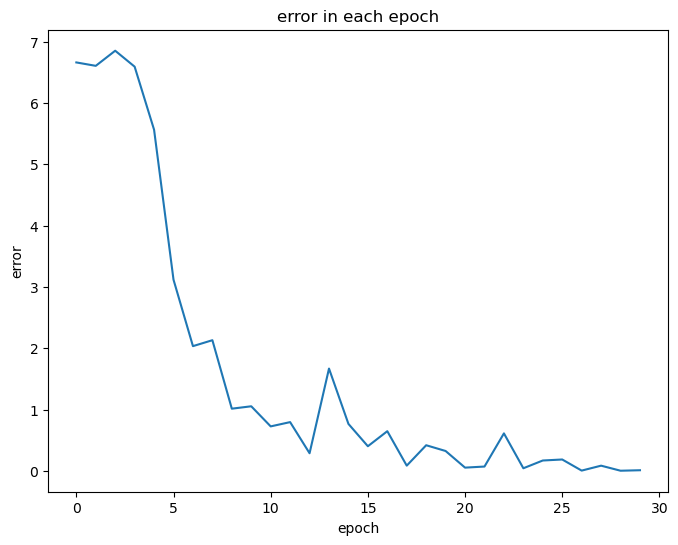

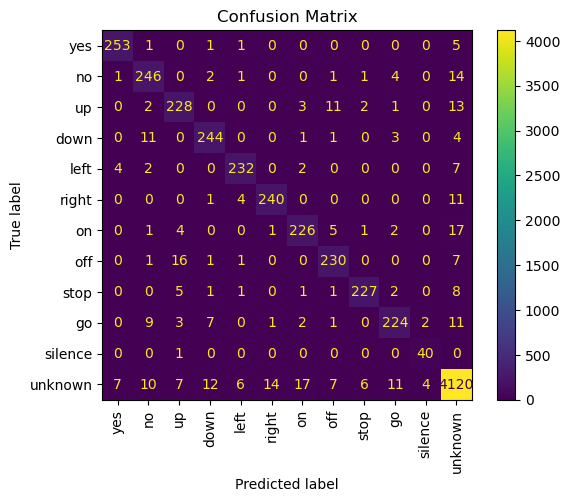

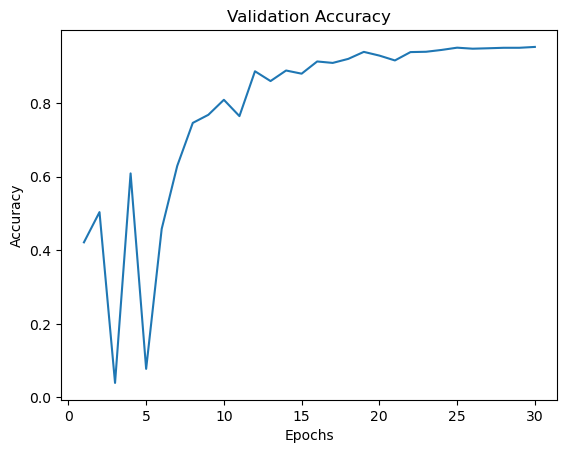

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

### Emformer test

In [27]:
model = models.EmformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0075
Test accuracy: 0.037432373153969876
Epoch [2/30], Train loss: 0.0077
Test accuracy: 0.617195496417605
Epoch [3/30], Train loss: 0.0076
Test accuracy: 0.617195496417605
Epoch [4/30], Train loss: 0.0076
Test accuracy: 0.617195496417605
Epoch [5/30], Train loss: 0.0070
Test accuracy: 0.4753618950138909
Epoch [6/30], Train loss: 0.0067
Test accuracy: 0.5010966515572453
Epoch [7/30], Train loss: 0.0069
Test accuracy: 0.5341424184822342
Epoch [8/30], Train loss: 0.0053
Test accuracy: 0.5117707267144319
Epoch [9/30], Train loss: 0.0054
Test accuracy: 0.6060827606375201
Epoch [10/30], Train loss: 0.0044
Test accuracy: 0.55344348588975
Epoch [11/30], Train loss: 0.0046
Test accuracy: 0.6151484135107472
Epoch [12/30], Train loss: 0.0044
Test accuracy: 0.6505337037578593
Epoch [13/30], Train loss: 0.0040
Test accuracy: 0.652142126041819
Epoch [14/30], Train loss: 0.0048
Test accuracy: 0.6250913876297705
Epoch [15/30], Train loss: 0.0040
Test accuracy: 0.6552127504

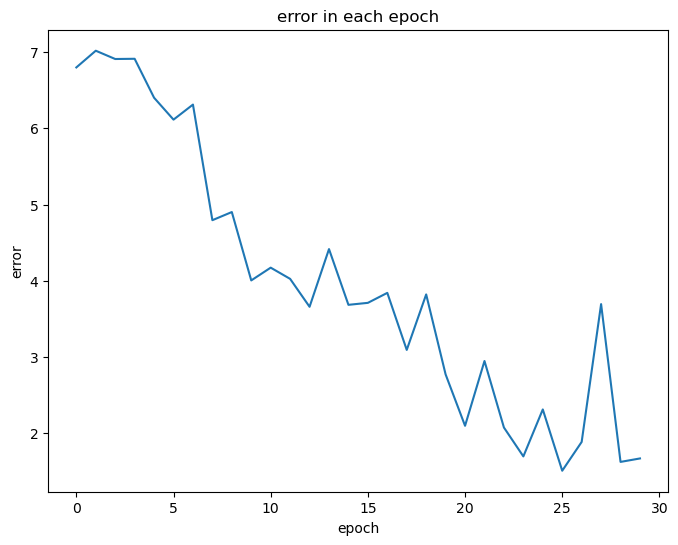

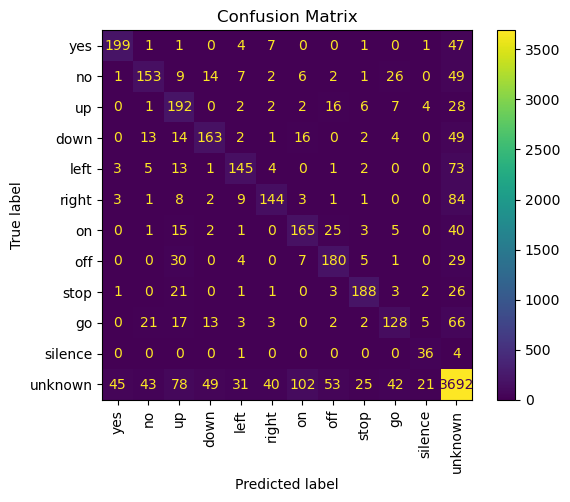

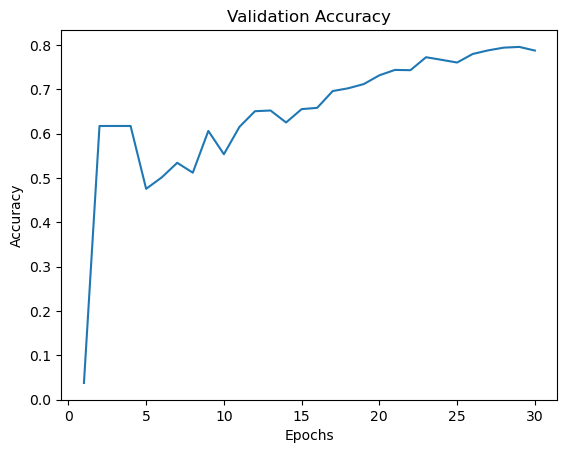

In [28]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

## Approaches tests

In [ ]:
# TODO

## Augmentation tests

### masking_param = 40

In [ ]:
transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

In [13]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0028
Test accuracy: 0.6923526831408101
Epoch [2/30], Train loss: 0.0031
Test accuracy: 0.8385728907735049
Epoch [3/30], Train loss: 0.0026
Test accuracy: 0.8594823804649803
Epoch [4/30], Train loss: 0.0015
Test accuracy: 0.9216259687088756
Epoch [5/30], Train loss: 0.0033
Test accuracy: 0.9312765024126334
Epoch [6/30], Train loss: 0.0012
Test accuracy: 0.920894867670712
Epoch [7/30], Train loss: 0.0017
Test accuracy: 0.9406345957011258
Epoch [8/30], Train loss: 0.0010
Test accuracy: 0.9283520982599796
Epoch [9/30], Train loss: 0.0005
Test accuracy: 0.9453136423453722
Epoch [10/30], Train loss: 0.0005
Test accuracy: 0.9548179558414973
Epoch [11/30], Train loss: 0.0008
Test accuracy: 0.9489691475361896
Epoch [12/30], Train loss: 0.0009
Test accuracy: 0.9055417458692792
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.9606667641468051
Epoch [14/30], Train loss: 0.0015
Test accuracy: 0.9540868548033338
Epoch [15/30], Train loss: 0.0011
Test accuracy: 0.9546717

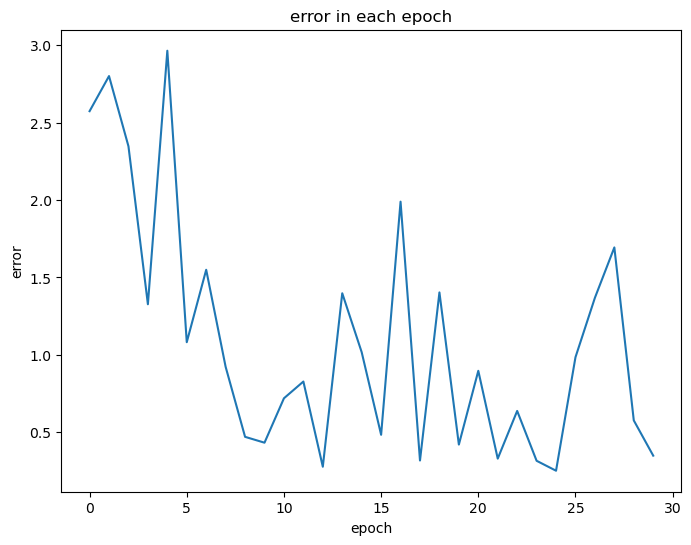

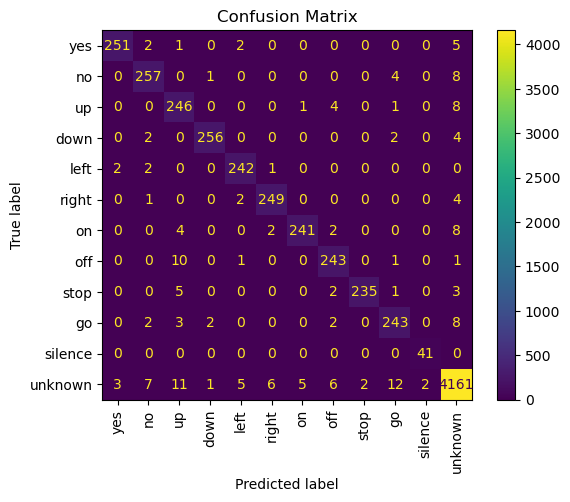

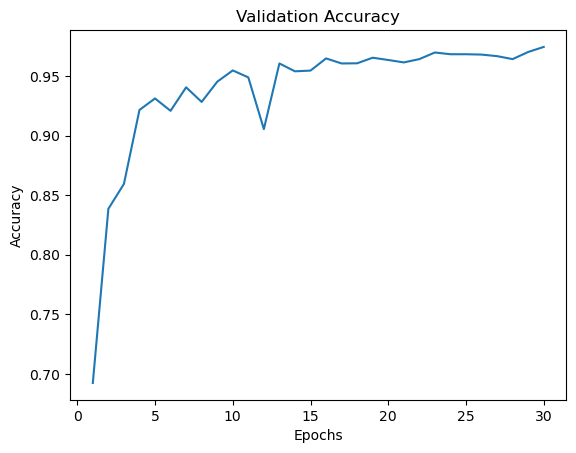

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

### masking_param = 30

In [ ]:
masking_param = 30

In [15]:
transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

In [16]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0025
Test accuracy: 0.6859189940049715
Epoch [2/30], Train loss: 0.0018
Test accuracy: 0.8724959789442901
Epoch [3/30], Train loss: 0.0024
Test accuracy: 0.8401813130574646
Epoch [4/30], Train loss: 0.0012
Test accuracy: 0.9029097821318907
Epoch [5/30], Train loss: 0.0016
Test accuracy: 0.9371253107179413
Epoch [6/30], Train loss: 0.0013
Test accuracy: 0.9283520982599796
Epoch [7/30], Train loss: 0.0012
Test accuracy: 0.9450212019301067
Epoch [8/30], Train loss: 0.0010
Test accuracy: 0.9432665594385145
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9501389091972511
Epoch [10/30], Train loss: 0.0009
Test accuracy: 0.9504313496125164
Epoch [11/30], Train loss: 0.0004
Test accuracy: 0.9562801579178243
Epoch [12/30], Train loss: 0.0006
Test accuracy: 0.9416581371545547
Epoch [13/30], Train loss: 0.0001
Test accuracy: 0.9540868548033338
Epoch [14/30], Train loss: 0.0018
Test accuracy: 0.9577423599941511
Epoch [15/30], Train loss: 0.0009
Test accuracy: 0.953940

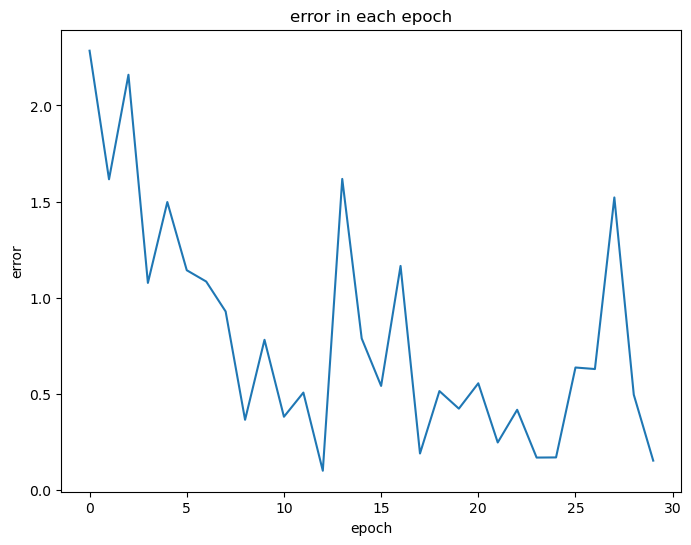

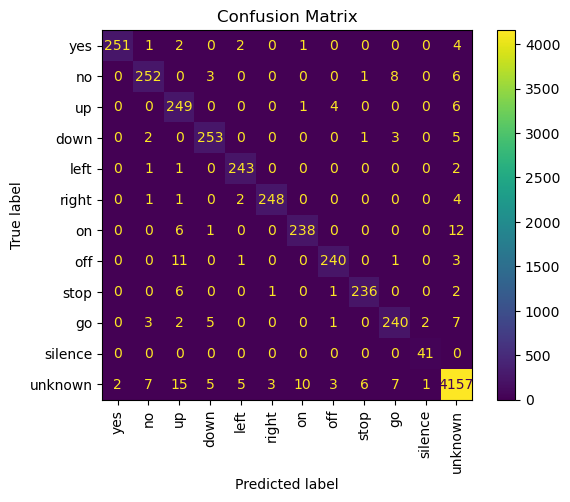

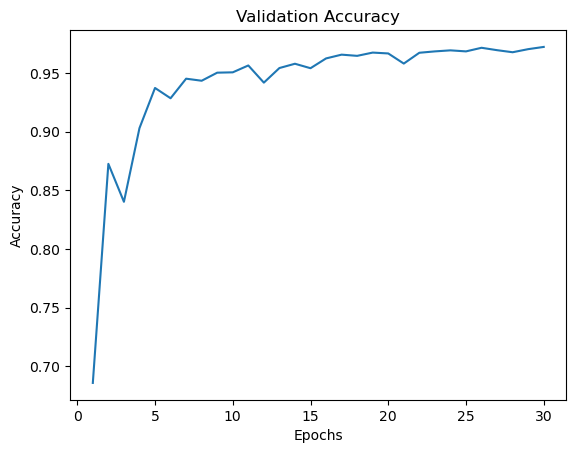

In [17]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

## Hyperparametres tests

In [ ]:
# TODO